<a href="https://colab.research.google.com/github/sandraliz/Covid-19-Analysis/blob/main/Day3_Covid_India_spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

import pandas as pd 
import io 
from google.colab import files 
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow


Plotly allows one to create interactive charts and maps 

In [36]:

uploaded = files.upload()


Saving covid_19_india-nov.csv to covid_19_india-nov (3).csv


In [37]:
df = pd.read_csv(io.BytesIO(uploaded['covid_19_india-nov.csv'])) 
print(df)

       Sno      Date     Time  ...   Cured Deaths Confirmed
0        1  30/01/20  6:00 PM  ...       0      0         1
1        2  31/01/20  6:00 PM  ...       0      0         1
2        3  01/02/20  6:00 PM  ...       0      0         2
3        4  02/02/20  6:00 PM  ...       0      0         3
4        5  03/02/20  6:00 PM  ...       0      0         3
...    ...       ...      ...  ...     ...    ...       ...
8481  8482  16/11/20  8:00 AM  ...  242084   1407    257876
8482  8483  16/11/20  8:00 AM  ...   30555    364     31962
8483  8484  16/11/20  8:00 AM  ...   62543   1107     68215
8484  8485  16/11/20  8:00 AM  ...  480965   7372    511304
8485  8486  16/11/20  8:00 AM  ...  394576   7661    431551

[8486 rows x 9 columns]


In [38]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,8486.000000,8.486000e+03,8486.000000,8.486000e+03
mean,4243.500000,6.233974e+04,1259.756776,7.526006e+04
std,2449.841525,1.631783e+05,4185.666015,1.886263e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2122.250000,8.500000e+01,2.000000,3.762500e+02
50%,4243.500000,3.174000e+03,50.000000,4.903000e+03
75%,6364.750000,3.908250e+04,712.500000,5.543175e+04
max,8486.000000,1.615379e+06,45974.000000,1.747242e+06


In [9]:
print("Number of State_Region: ", df['State/UnionTerritory'].nunique())
print("Dates go from day", max(df['Date']), "to day", min(df['Date']), ", a total of", df['Date'].nunique(), "days")
print("State informed: ", df[df['State/UnionTerritory'].isna()==False]['State/UnionTerritory'].unique())

Number of State_Region:  45
Dates go from day 9/9/2020 to day 1/10/2020 , a total of 292 days
State informed:  ['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu'
 'Dadra and Nagar Haveli and Daman and Diu' 'Telangana' 'Telangana***'
 'Telengana***' 'Maharashtra***' 'Chandigarh***' 'Punjab***']


In [39]:
pie_chart = px.pie(df, values = "Confirmed", names = "State/UnionTerritory", title = "Infection across India")
pie_chart.update_traces(textposition = "inside")
pie_chart.show()

In [11]:
fig = px.bar(df, x='State/UnionTerritory', y = 'Deaths', color='State/UnionTerritory', title ='Number of reported deaths across countries')

fig.show()

In [24]:
fig = px.bar(df, x='State/UnionTerritory', y = 'Cured', color='State/UnionTerritory', title ='Number of cases Recovered  across countries')
fig.show()

In [40]:
 df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%y')

In [41]:
# Compute ratios
df['cdRatio']=df.Deaths/df.Confirmed
df['activeCases']=df.Confirmed-df.Deaths-df.Cured
df['crRatio']=1-df.Cured/df.Confirmed

df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,cdRatio,activeCases,crRatio
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,0.000000,1,1.000000
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,0.000000,1,1.000000
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,0.000000,2,1.000000
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,0.000000,3,1.000000
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,0.000000,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8481,8482,2020-11-16,8:00 AM,Telengana,-,-,242084,1407,257876,0.005456,14385,0.061239
8482,8483,2020-11-16,8:00 AM,Tripura,-,-,30555,364,31962,0.011389,1043,0.044021
8483,8484,2020-11-16,8:00 AM,Uttarakhand,-,-,62543,1107,68215,0.016228,4565,0.083149
8484,8485,2020-11-16,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304,0.014418,22967,0.059337


In [42]:
active_India = pd.DataFrame(df.groupby('Date')['activeCases'].sum()).reset_index()
active_India

,Date,activeCases
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
287,2020-11-12,489294
288,2020-11-13,484547
289,2020-11-14,480719
290,2020-11-15,479216


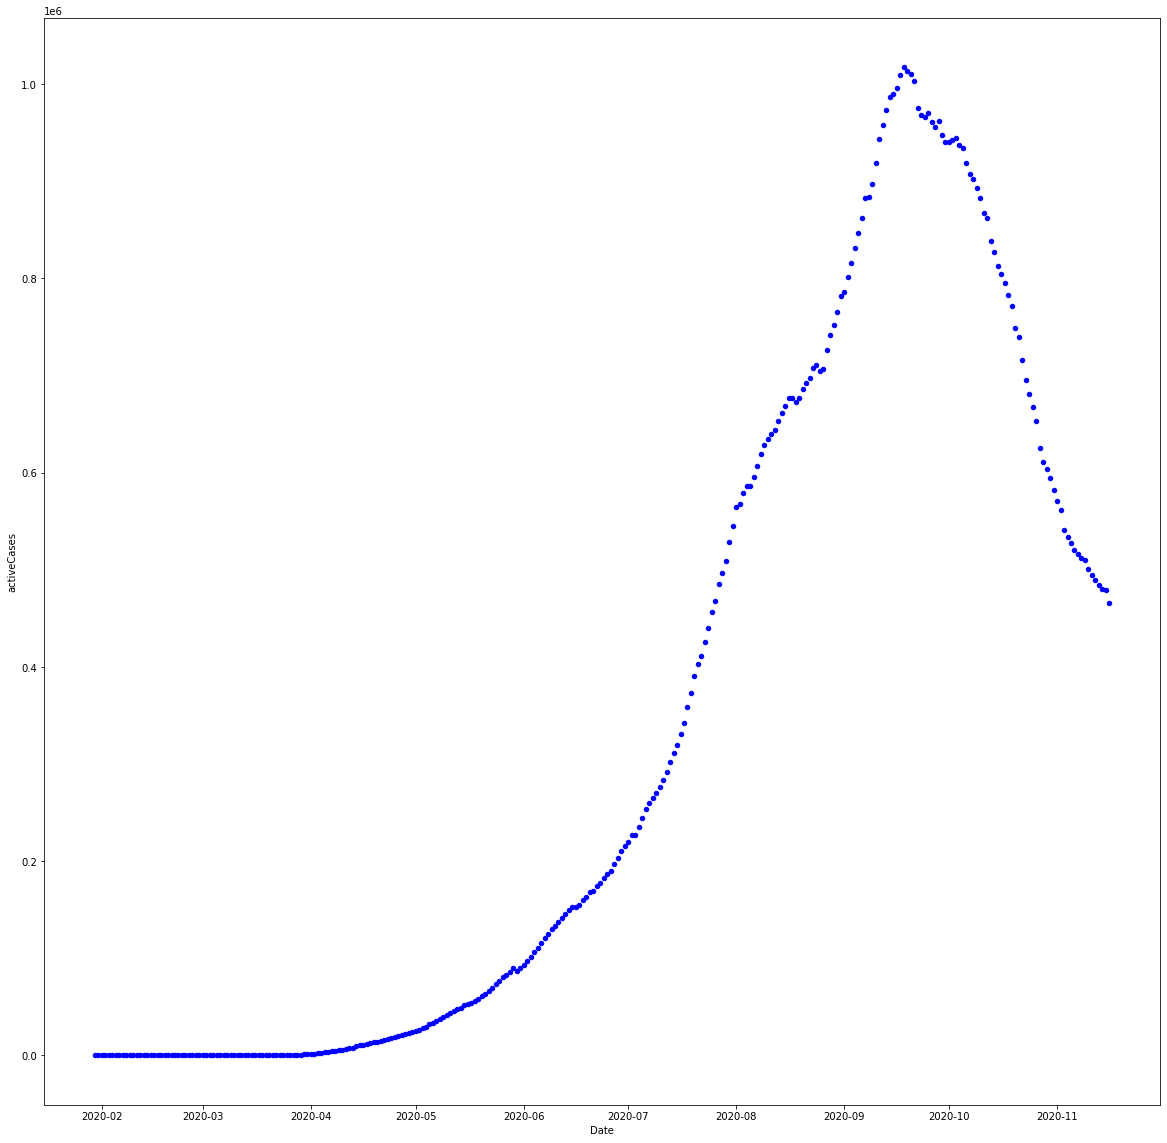

In [43]:
plt.rcParams["figure.figsize"]=20,20 
# Plot column 'Confirmed'
active_India.plot(kind = 'scatter', x = 'Date', y = 'activeCases', color = 'blue')


plt.show()

In [44]:
confirmed_total_date = pd.DataFrame(df.groupby('Date')['Confirmed'].sum()).reset_index()
deceased_total_date = pd.DataFrame(df.groupby('Date')['Deaths'].sum()).reset_index()

In [45]:
confirmed_total_date

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3
...,...,...
287,2020-11-12,8683916
288,2020-11-13,8728795
289,2020-11-14,8773479
290,2020-11-15,8814579


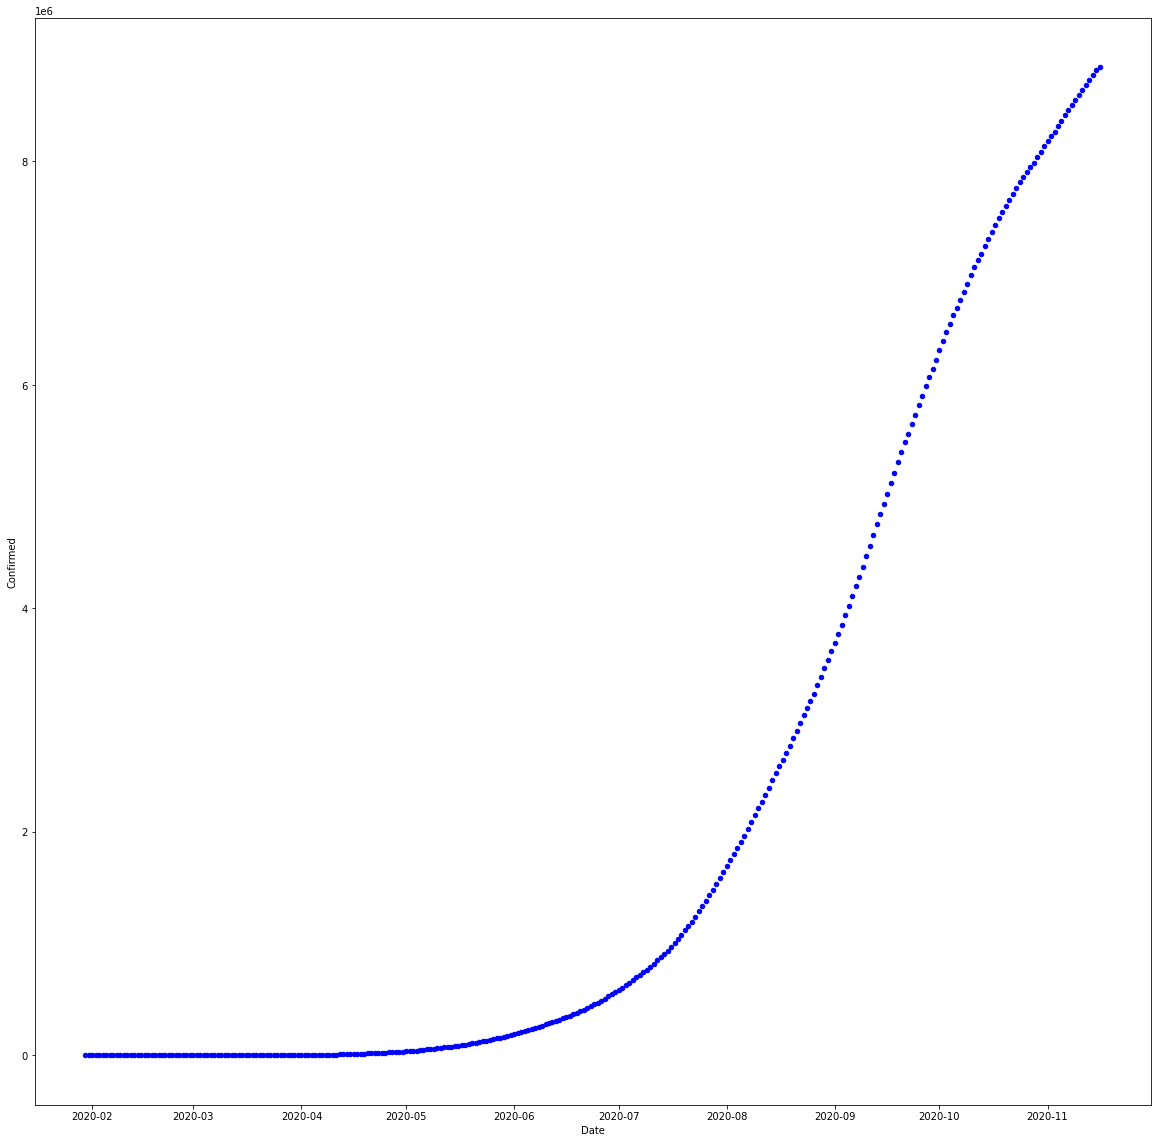

In [46]:

plt.rcParams["figure.figsize"]=20,20 
# Plot column 'Confirmed'
confirmed_total_date.plot(kind = 'scatter', x = 'Date', y = 'Confirmed', color = 'blue')


plt.show()

In [47]:
df_kerala = df[df['State/UnionTerritory'] == 'Kerala']
print(df_kerala)

       Sno       Date     Time  ...   cdRatio activeCases   crRatio
0        1 2020-01-30  6:00 PM  ...  0.000000           1  1.000000
1        2 2020-01-31  6:00 PM  ...  0.000000           1  1.000000
2        3 2020-02-01  6:00 PM  ...  0.000000           2  1.000000
3        4 2020-02-02  6:00 PM  ...  0.000000           3  1.000000
4        5 2020-02-03  6:00 PM  ...  0.000000           3  1.000000
...    ...        ...      ...  ...       ...         ...       ...
8327  8328 2020-11-12  8:00 AM  ...  0.003523       78538  0.159749
8362  8363 2020-11-13  8:00 AM  ...  0.003534       77931  0.156864
8397  8398 2020-11-14  8:00 AM  ...  0.003544       77508  0.154321
8432  8433 2020-11-15  8:00 AM  ...  0.003551       77046  0.151598
8467  8468 2020-11-16  8:00 AM  ...  0.003560       74922  0.146269

[292 rows x 12 columns]


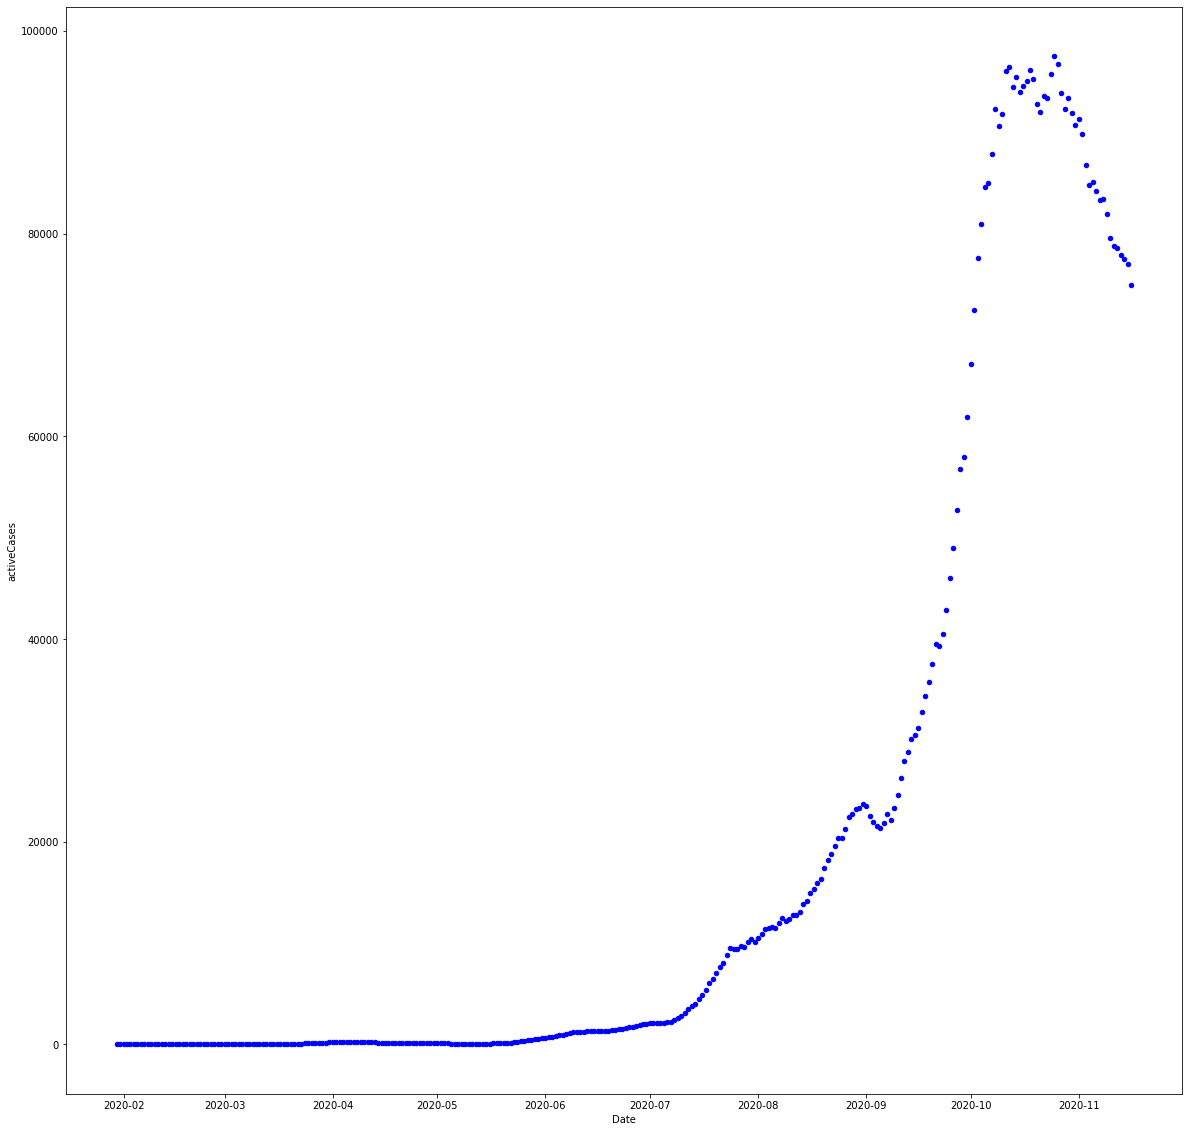

In [48]:
# Increase size of plot
plt.rcParams["figure.figsize"]=20,20  # Remove if not on Jupyter
# Plot column 'Confirmed'
df_kerala.plot(kind = 'scatter', x = 'Date', y = 'activeCases', color = 'blue')


plt.show()

In [23]:
temp = df.groupby('Date').sum().reset_index()

# adding two more columns
temp['No. of Deaths to 100 Confirmed Cases'] = round(temp['Deaths']/temp['Confirmed'], 3)*100
temp['No. of Recovered to 100 Confirmed Cases'] = round(temp['Cured']/temp['Confirmed'], 3)*100
# temp['No. of Recovered to 1 Death Case'] = round(temp['Recovered']/temp['Deaths'], 3)

temp = temp.melt(id_vars='Date', value_vars=['No. of Deaths to 100 Confirmed Cases', 'No. of Recovered to 100 Confirmed Cases'], 
                 var_name='Ratio', value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over The Time',
              color_discrete_sequence=[dth, rec])
fig.update_layout(legend=dict(orientation="h", y=1, x=0, 
                              xanchor="left", yanchor="top"),
                  margin=dict(t=80,l=0,r=0,b=0))
fig

Text(0.5, 0, 'Date')

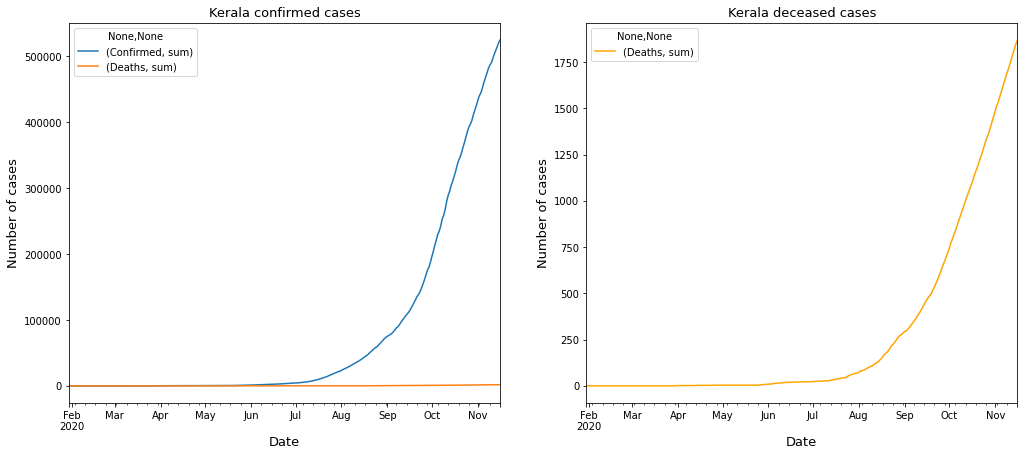

In [ ]:
confirmed_total_date1 = df_kerala.groupby(['Date']).agg({'Confirmed':['sum']})
#print(confirmed_total_date)
fatalities_total_date1 = df_kerala.groupby(['Date']).agg({'Deaths':['sum']})
total_date = confirmed_total_date1.join(fatalities_total_date1)
type(fatalities_total_date1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Kerala confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date1.plot(ax=ax2, color='orange')
ax2.set_title("Kerala deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)